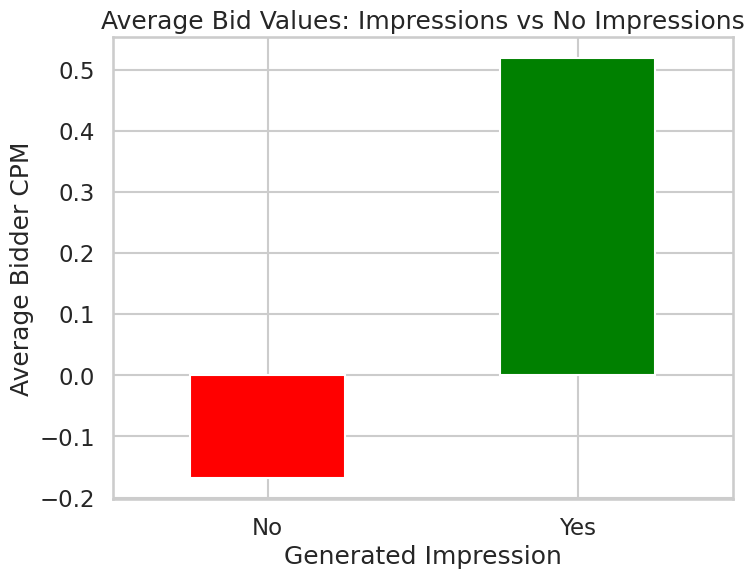

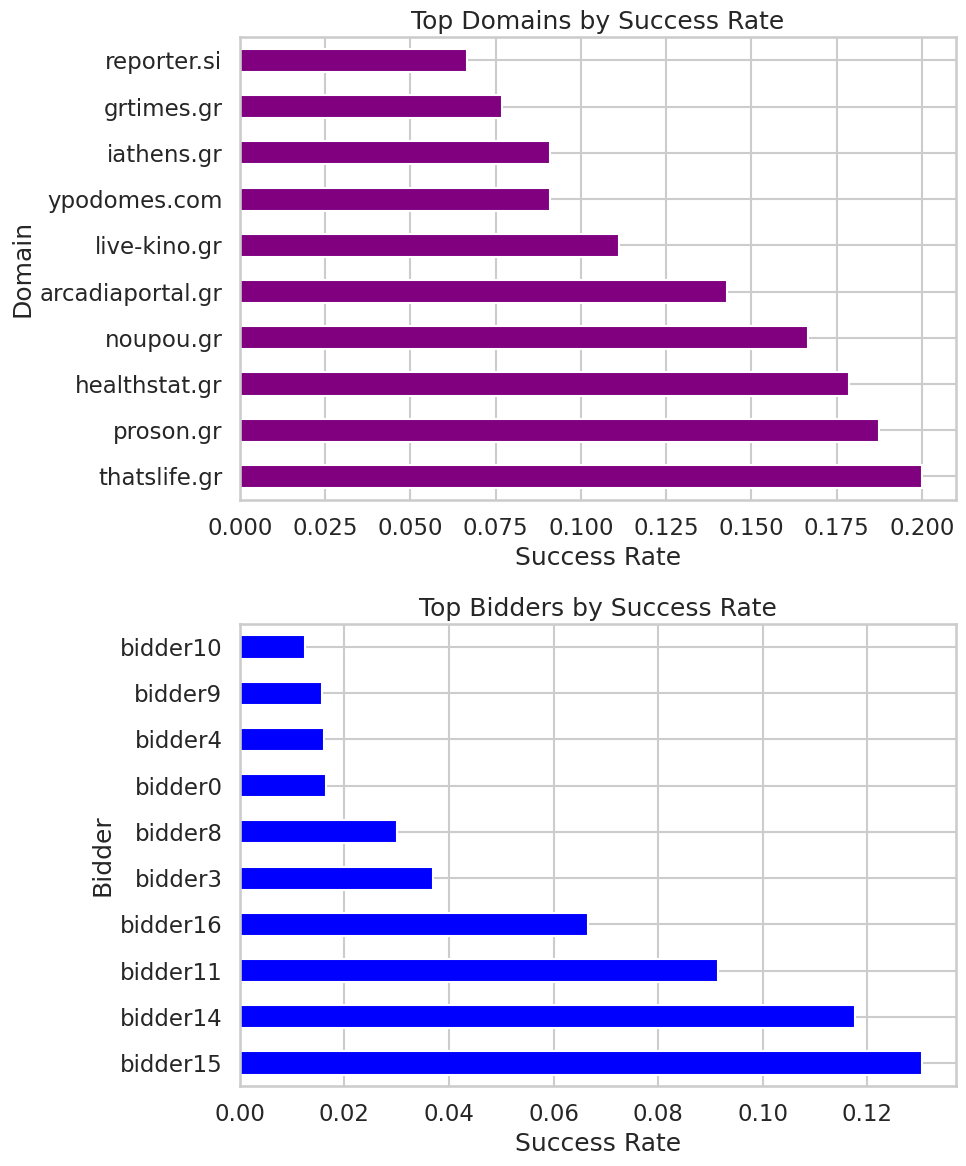

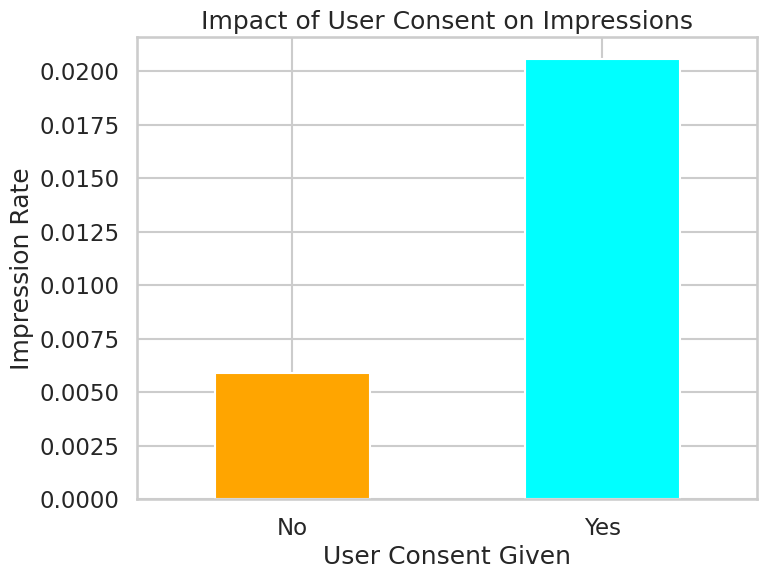

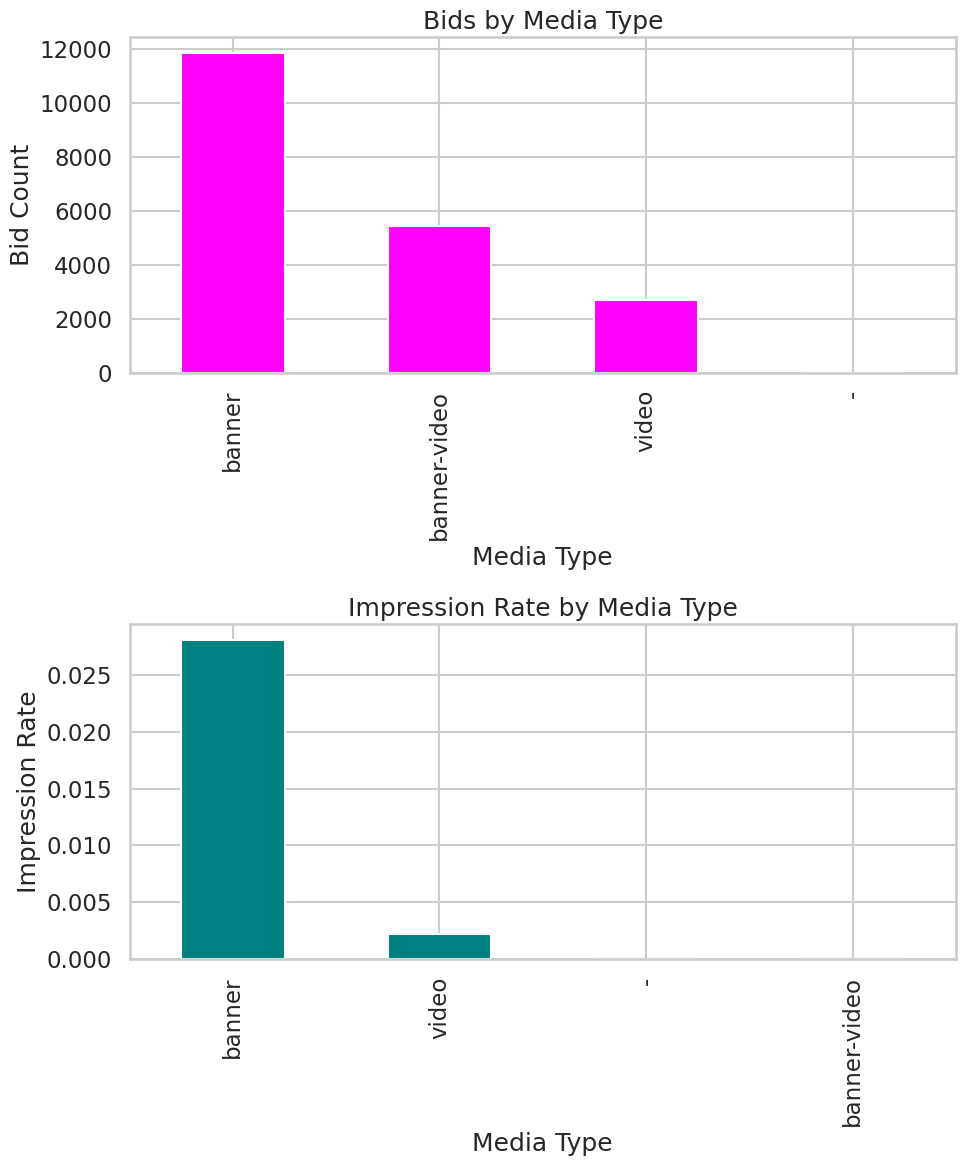

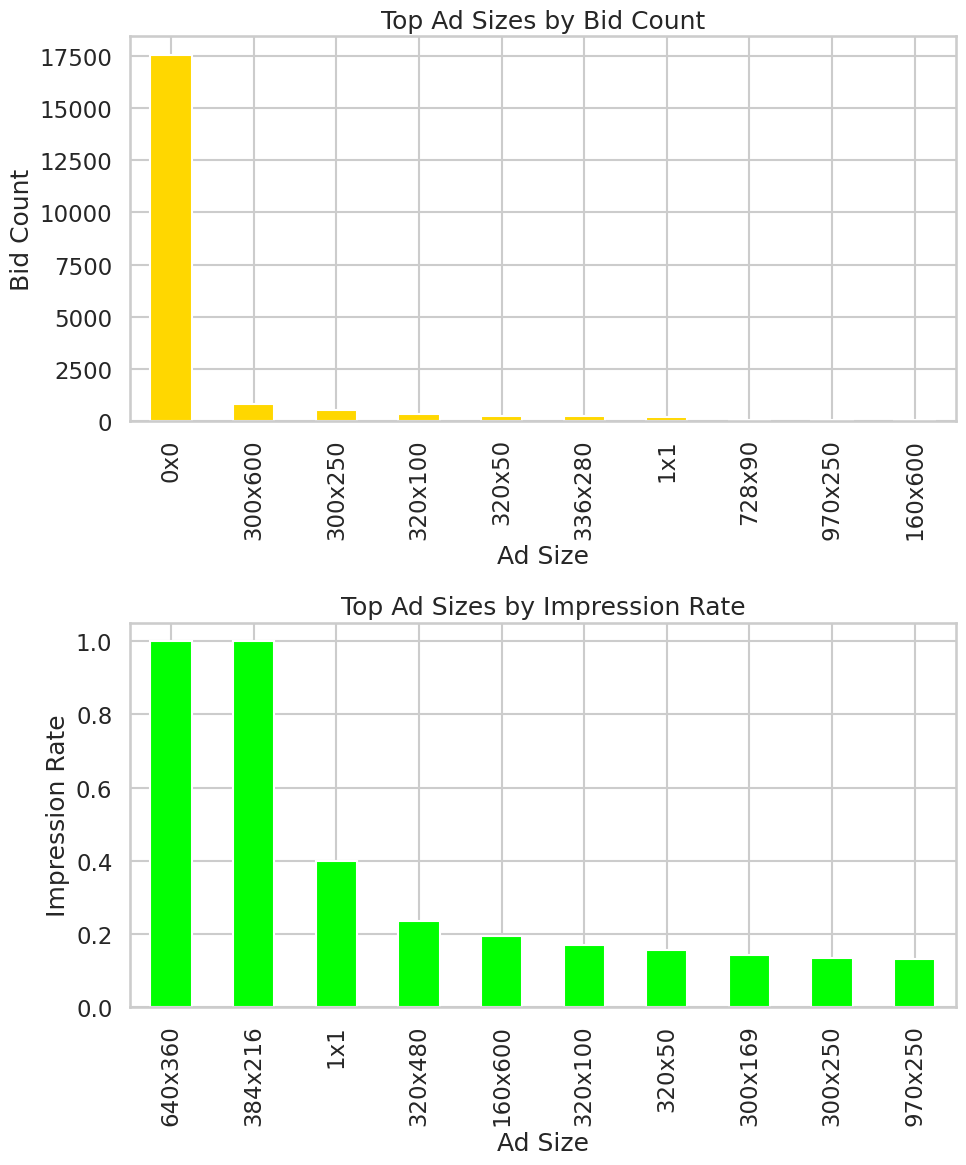

<ipython-input-2-157cd8a8f3a4>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
<ipython-input-2-157cd8a8f3a4>:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bidder_is_after_timeout', data=df, palette='pastel')
<ipython-input-2-157cd8a8f3a4>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_counts.index, y=os_counts.values, palette='autumn')
<ipython-input-2-157cd8a8f3a4>:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

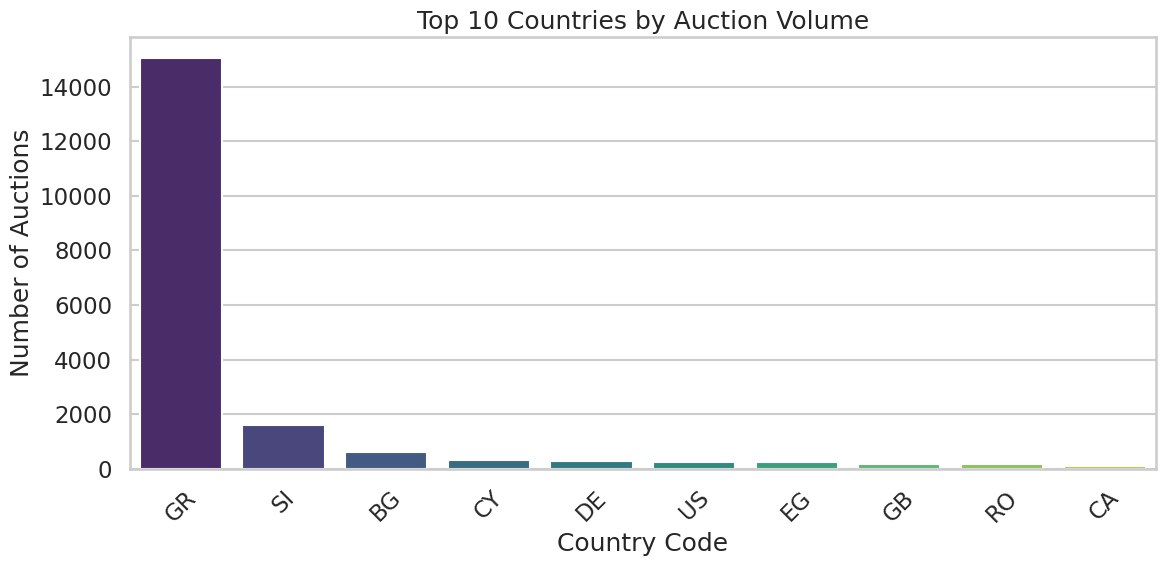

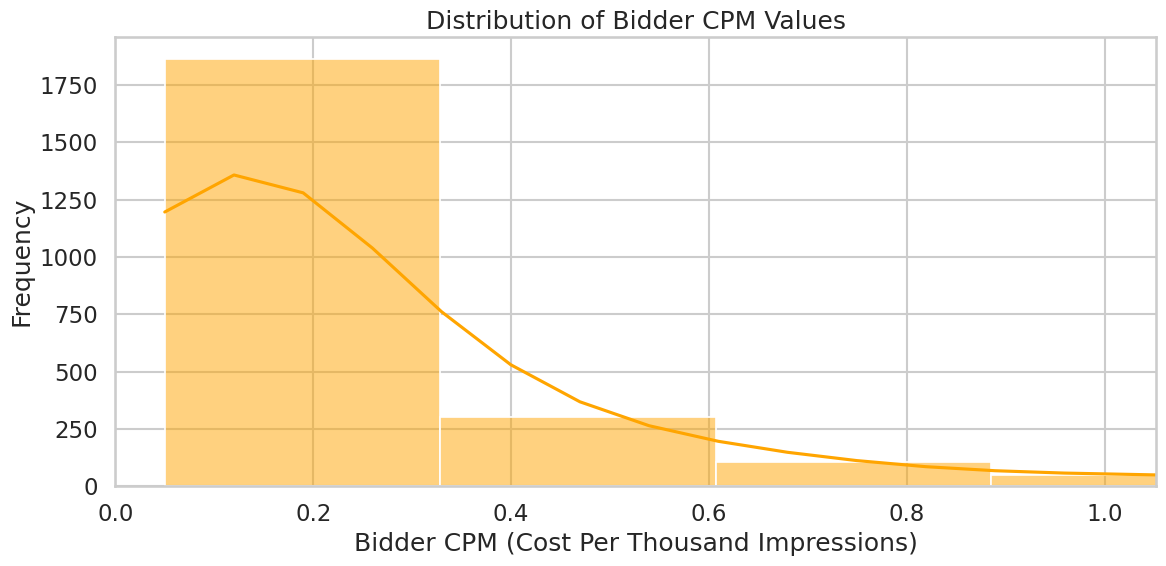

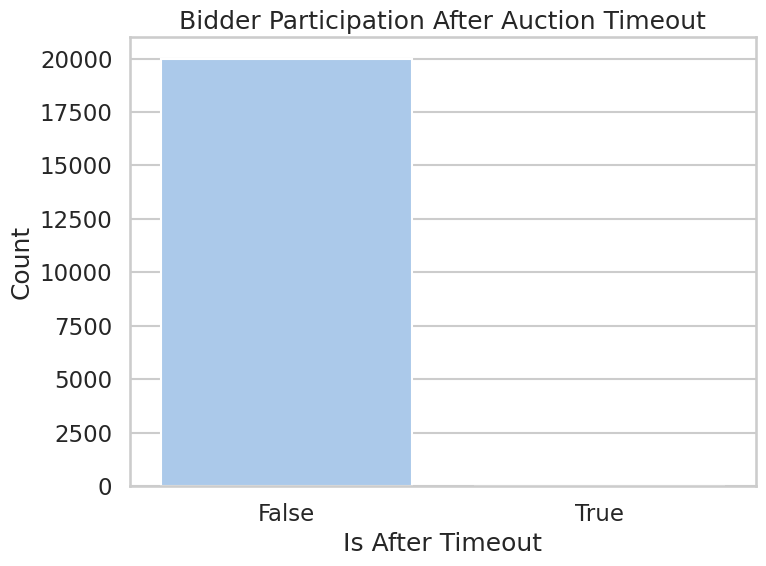

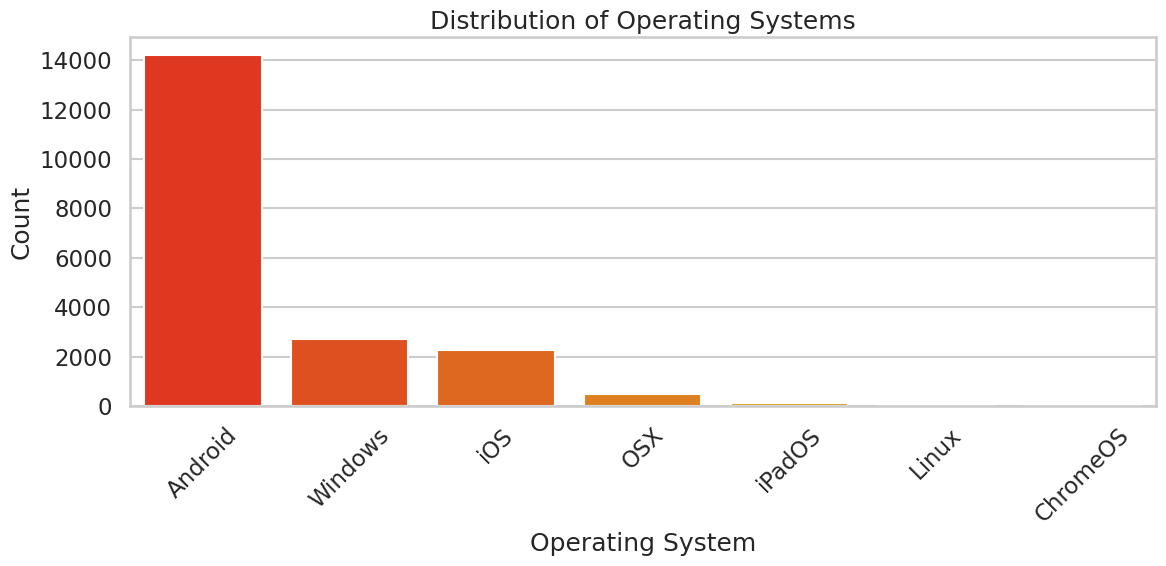

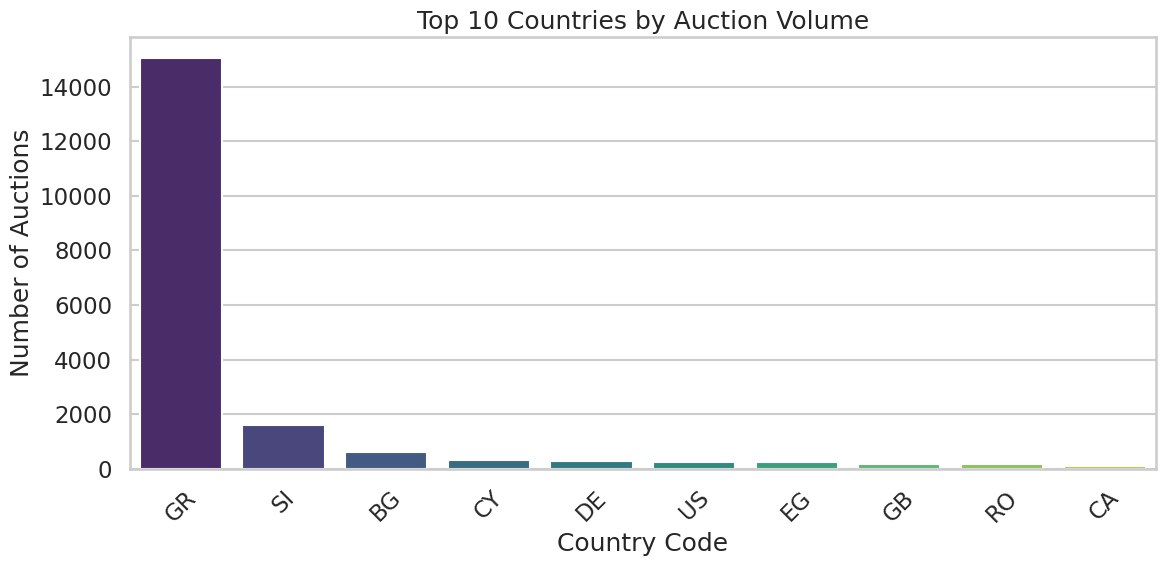

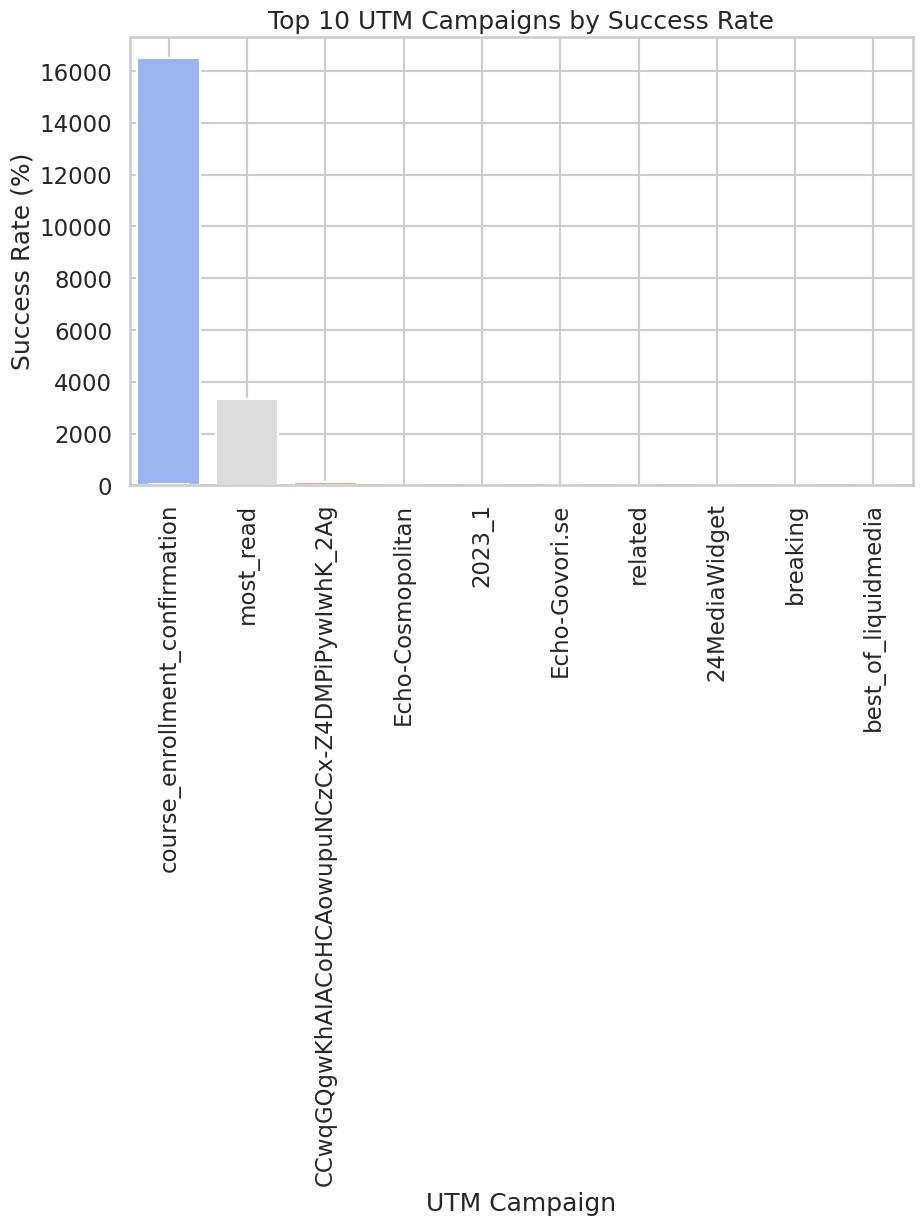

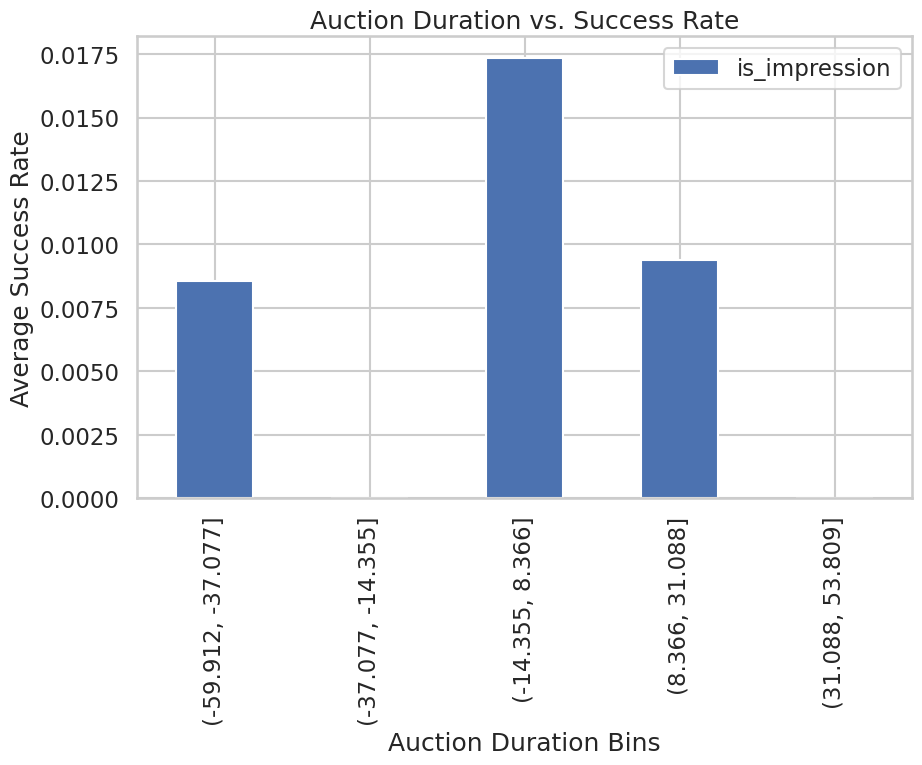

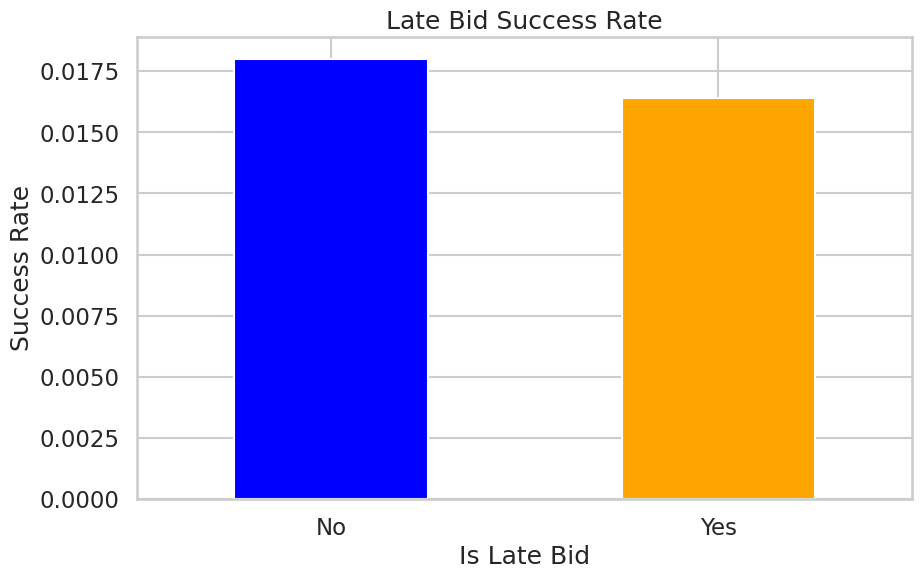

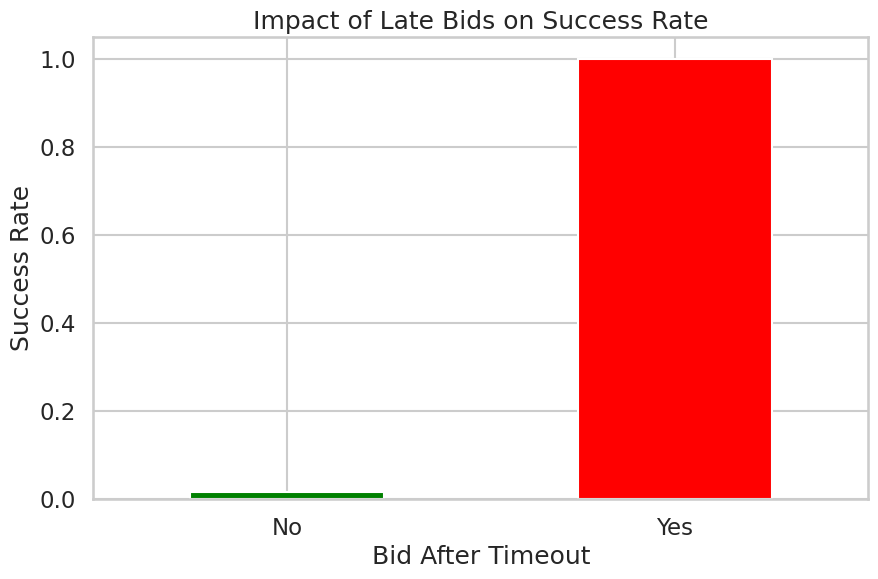

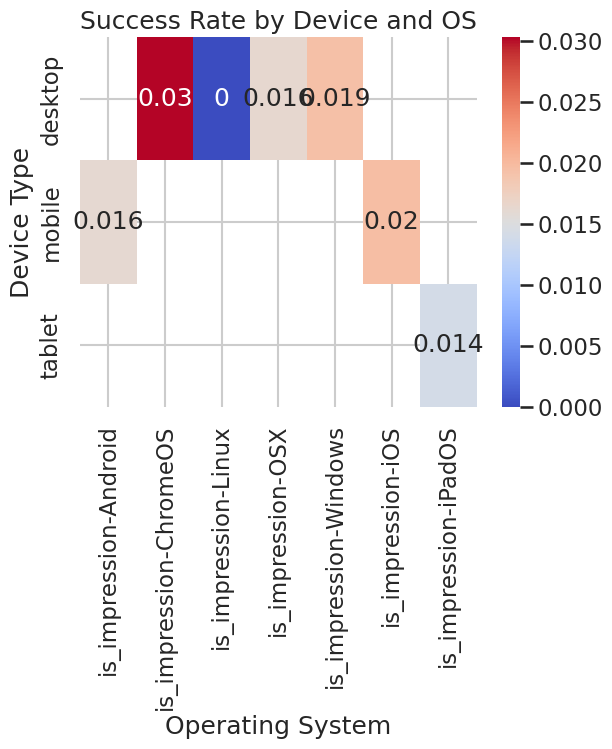

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('analysis.csv')

# Convert 'day' to datetime format for time series analysis
df['day'] = pd.to_datetime(df['day'])

# Data Quality Assessment: Missing Values
missing_values_complete = df.isnull().sum()
missing_percentage = (missing_values_complete / len(df)) * 100

# Trends Over Time: Bidding Activity and Impressions
daily_activity = df.groupby('day').agg({'oeid':'count', 'is_impression':'sum'}).rename(columns={'oeid':'total_bids', 'is_impression':'total_impressions'})

# Device Usage Analysis
device_usage = df['device'].value_counts()

# Geographic Distribution
country_distribution = df['country'].value_counts().head(10) # Top 10 countries

# Bidding Behavior: Analyzing average bid values and success rate
avg_bid_values = df.groupby('is_impression')['bidder_cpm'].mean()
domain_success_rate = df.groupby('domain')['is_impression'].mean().sort_values(ascending=False).head(10) # Top 10 domains by success rate
bidder_success_rate = df.groupby('bidder')['is_impression'].mean().sort_values(ascending=False).head(10) # Top 10 bidders by success rate

# Impact of User Consent on Impressions
consent_impact = df.groupby('consent')['is_impression'].mean()

# Ad Performance Metrics: Media Types and Ad Sizes
df['ad_size'] = df['bidder_width'].astype(str) + 'x' + df['bidder_height'].astype(str)
media_type_bids = df['bidder_media_type'].value_counts()
media_type_impressions = df.groupby('bidder_media_type')['is_impression'].mean().sort_values(ascending=False)
ad_size_bids = df['ad_size'].value_counts().head(10)  # Top 10 ad sizes by bid count
ad_size_impressions = df.groupby('ad_size')['is_impression'].mean().sort_values(ascending=False).head(10)  # Top 10 ad sizes by impression rate

# Visualization setup
sns.set(style="whitegrid", context="talk")

# Plot 1: Average Bid Values for Impressions vs No Impressions
fig, ax = plt.subplots(figsize=(8, 6))
avg_bid_values.plot(kind='bar', ax=ax, color=['red', 'green'])
ax.set_title('Average Bid Values: Impressions vs No Impressions')
ax.set_xlabel('Generated Impression')
ax.set_ylabel('Average Bidder CPM')
ax.set_xticklabels(['No', 'Yes'], rotation=0)
plt.show()

# Subsequent plots are created following a similar structure to Plot 1, adjusting the data source and labels as needed for:
# - Success Rate Across Domains and Bidders
# - Impact of User Consent on Impressions
# - Bids and Impression Rates by Media Type
# - Bids and Impression Rates by Ad Size
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Success Rate by Domains
domain_success_rate.plot(kind='barh', ax=axes[0], color='purple')
axes[0].set_title('Top Domains by Success Rate')
axes[0].set_xlabel('Success Rate')
axes[0].set_ylabel('Domain')

# Success Rate by Bidders
bidder_success_rate.plot(kind='barh', ax=axes[1], color='blue')
axes[1].set_title('Top Bidders by Success Rate')
axes[1].set_xlabel('Success Rate')
axes[1].set_ylabel('Bidder')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
consent_impact.plot(kind='bar', ax=ax, color=['orange', 'cyan'])
ax.set_title('Impact of User Consent on Impressions')
ax.set_xlabel('User Consent Given')
ax.set_ylabel('Impression Rate')
ax.set_xticklabels(['No', 'Yes'], rotation=0)

plt.show()

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bids by Media Type
media_type_bids.plot(kind='bar', ax=axes[0], color='magenta')
axes[0].set_title('Bids by Media Type')
axes[0].set_xlabel('Media Type')
axes[0].set_ylabel('Bid Count')

# Impression Rate by Media Type
media_type_impressions.plot(kind='bar', ax=axes[1], color='teal')
axes[1].set_title('Impression Rate by Media Type')
axes[1].set_xlabel('Media Type')
axes[1].set_ylabel('Impression Rate')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Bids by Ad Size
ad_size_bids.plot(kind='bar', ax=axes[0], color='gold')
axes[0].set_title('Top Ad Sizes by Bid Count')
axes[0].set_xlabel('Ad Size')
axes[0].set_ylabel('Bid Count')

# Impression Rate by Ad Size
ad_size_impressions.plot(kind='bar', ax=axes[1], color='lime')
axes[1].set_title('Top Ad Sizes by Impression Rate')
axes[1].set_xlabel('Ad Size')
axes[1].set_ylabel('Impression Rate')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Auction Volume')
plt.xlabel('Country Code')
plt.ylabel('Number of Auctions')
plt.xticks(rotation=45)
plt.tight_layout()

# Distribution of Bidder CPM Values
plt.figure(figsize=(12, 6))
sns.histplot(df[df['bidder_cpm'] > 0]['bidder_cpm'], bins=50, color='orange', kde=True)
plt.title('Distribution of Bidder CPM Values')
plt.xlabel('Bidder CPM (Cost Per Thousand Impressions)')
plt.ylabel('Frequency')
plt.xlim(0, df[df['bidder_cpm'] > 0]['bidder_cpm'].quantile(0.95))
plt.tight_layout()

# Bidder Participation After Auction Timeout
plt.figure(figsize=(8, 6))
sns.countplot(x='bidder_is_after_timeout', data=df, palette='pastel')
plt.title('Bidder Participation After Auction Timeout')
plt.xlabel('Is After Timeout')
plt.ylabel('Count')
plt.tight_layout()

plt.figure(figsize=(12, 6))
os_counts = df['os'].value_counts()
sns.barplot(x=os_counts.index, y=os_counts.values, palette='autumn')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# plt.figure(figsize=(12, 6))
# sns.histplot(df['auction_duration_sec'], bins=30, color='purple', kde=True)
# plt.title('Distribution of Auction Durations')
# plt.xlabel('Auction Duration (Seconds)')
# plt.ylabel('Frequency')
# plt.tight_layout()

plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries by Auction Volume')
plt.xlabel('Country Code')
plt.ylabel('Number of Auctions')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(8, 6))
sns.countplot(x='device', data=df, palette='coolwarm')
plt.title('Device Distribution')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.tight_layout()

utm_campaign_analysis = df.groupby(['utm_campaign']).agg({'oeid': 'count', 'is_impression': 'sum'}).rename(columns={'oeid': 'total_bids', 'is_impression': 'total_impressions'})
utm_campaign_analysis['success_rate'] = utm_campaign_analysis['total_impressions'] / utm_campaign_analysis['total_bids'] * 100
utm_campaign_analysis = utm_campaign_analysis.sort_values(by='success_rate', ascending=False)

utm_campaign_analysis['success_rate'].head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 UTM Campaigns by Success Rate')
plt.xlabel('UTM Campaign')
plt.ylabel('Success Rate (%)')
plt.show()


# Calculate auction duration in seconds
df['auction_duration'] = (pd.to_datetime(df['auction_end']) - pd.to_datetime(df['auction_start'])).dt.total_seconds()

# Analyze relationship with success rates
auction_duration_analysis = df.groupby(pd.cut(df['auction_duration'], bins=5)).agg({'is_impression': 'mean'})

# Bids placed towards auction end
df['bid_time_to_end'] = (pd.to_datetime(df['auction_end']) - pd.to_datetime(df['bidder_end'])).dt.total_seconds()
df['late_bid'] = df['bid_time_to_end'] < df['auction_duration'].quantile(0.25) # Bids in the last 25% of auction time

late_bid_analysis = df.groupby('late_bid')['is_impression'].mean()

auction_duration_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Auction Duration vs. Success Rate')
plt.xlabel('Auction Duration Bins')
plt.ylabel('Average Success Rate')
plt.show()

late_bid_analysis.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Late Bid Success Rate')
plt.xlabel('Is Late Bid')
plt.ylabel('Success Rate')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# Use existing 'late_bid' column for analysis
late_bid_success_rate = df.groupby('bidder_is_after_timeout')['is_impression'].mean()

late_bid_success_rate.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Impact of Late Bids on Success Rate')
plt.xlabel('Bid After Timeout')
plt.ylabel('Success Rate')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


device_os_success = df.groupby(['device', 'os']).agg({'is_impression': 'mean'}).unstack()

sns.heatmap(device_os_success, annot=True, cmap='coolwarm')
plt.title('Success Rate by Device and OS')
plt.xlabel('Operating System')
plt.ylabel('Device Type')
plt.show()

